<a href="https://colab.research.google.com/github/jeong1117/study_DL/blob/main/Dog_and_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고페이지
https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

In [3]:
# tmp 폴더에 데이터셋 다운로드 구문
# 약 3,000개의 이미지를 추출한 간소화된 버전의 데이터셋

!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-05-13 06:31:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.163.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   205MB/s    in 0.3s    

2023-05-13 06:31:29 (205 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# 데이터셋 압축 해제 구문

import os
import zipfile

# zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r').extractall('/tmp')
# 아래 3줄, 위에 1줄로 대체 가능
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

In [5]:
# 경로 지정 구문
# 운영체제마다 폴더를 구분하는 구분자가 다름 - 윈도우 \, 리눅스 /
# 문자열 더하기 연산으로 생성할 경우 리눅스에서는 동작, 윈도우에서는 에러발생 가능
# os.path.join 은 어떤 운영체제던 경로를 알맞게 생성해줌

# 기본경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
# os.listdir - 경로 내에 파일 이름을 리스트 형태로 반환
# train/cats 와 train/dogs 내 파일명을 리스트 형태로 저장

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [7]:
# 각 경로의 파일 갯수 확인 구문

print('Total training cat images : ', len(os.listdir(train_cats_dir)))
print('Total training dog images : ', len(os.listdir(train_dogs_dir)))

print('Total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images : ', len(os.listdir(validation_dogs_dir)))

Total training cat images :  1000
Total training dog images :  1000
Total validation cat images :  500
Total validation dog images :  500


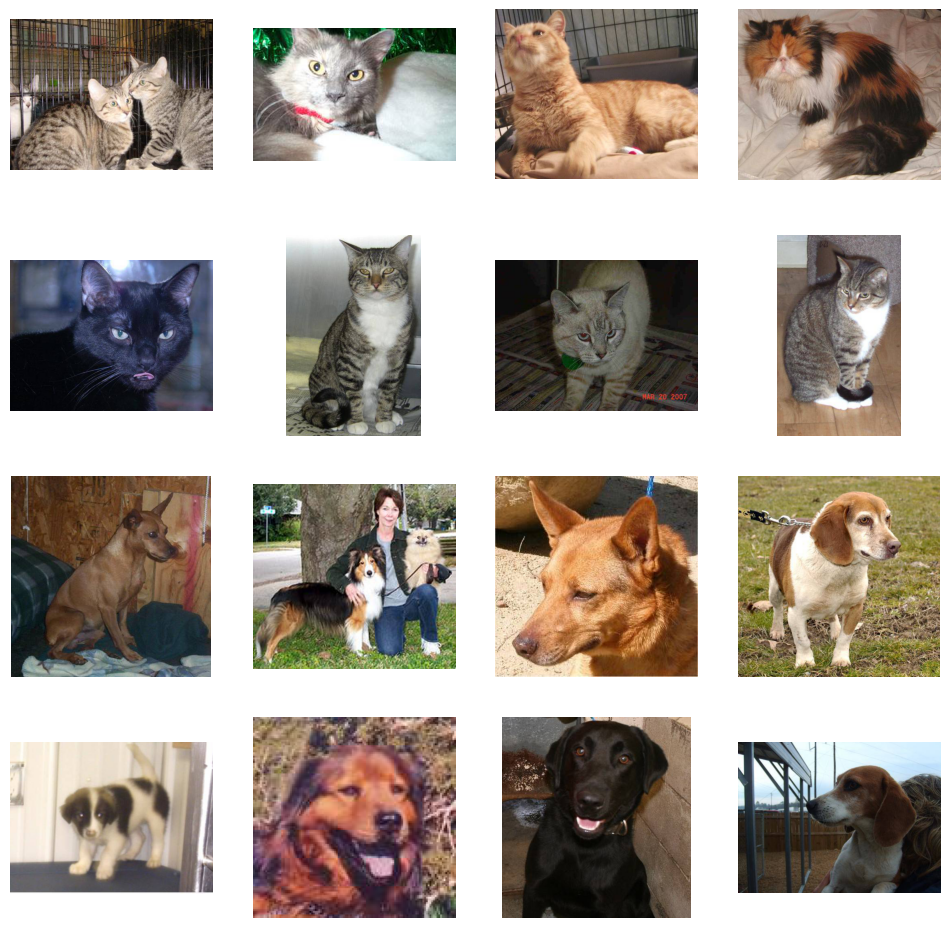

In [8]:
# 이미지 확인 구문

# 결과를 해당 브라우저에서 셀아래 inline 으로 표시
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

# figure 객체 생성, 사이즈는 튜플 형태로 전달
fig = plt.figure(figsize=(ncols*3, nrows*3))
# fig = plt.gcf()   // 현재 figure 객체 확인, figure 객체 없으면 생성
# fig.set_size_inches(ncols*3, nrows*3)   // 객체 생성하고 사이즈 나중에 지정하는 구문

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[0:8]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[0:8]]

# enumerate - 열거하다 / 인덱스 값을 포함하는 객체 리턴
for i, img_path in enumerate(next_cat_pix+next_dog_pix, start=1):
  sp = plt.subplot(nrows, ncols, i)
  sp.axis('Off')    # 축은 표현 안함

  plt.imshow(mpimg.imread(img_path))

# 이 구문은 왜 들어가있는걸까..
plt.show()

In [9]:
# 모델 구성 구문
# tensorflow 로 합성곱 신경망 모델 구성 -> summary() 메서드로 신경망 구조 확인 ???????

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
# 모델 컴파일 구문

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
# 이미지 데이터 전처리 구문

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20,
                                                    class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20,
                                                         class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# 모델 훈련 구문

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_steps = 50,
                    verbose = 2)

Epoch 1/100
100/100 - 44s - loss: 0.7360 - accuracy: 0.5505 - val_loss: 0.6808 - val_accuracy: 0.5320 - 44s/epoch - 444ms/step
Epoch 2/100
100/100 - 47s - loss: 0.6677 - accuracy: 0.6115 - val_loss: 0.6382 - val_accuracy: 0.6570 - 47s/epoch - 473ms/step
Epoch 3/100
100/100 - 57s - loss: 0.6053 - accuracy: 0.6785 - val_loss: 0.6174 - val_accuracy: 0.6590 - 57s/epoch - 571ms/step
Epoch 4/100
100/100 - 61s - loss: 0.5383 - accuracy: 0.7310 - val_loss: 0.6876 - val_accuracy: 0.6190 - 61s/epoch - 614ms/step
Epoch 5/100
100/100 - 60s - loss: 0.4702 - accuracy: 0.7820 - val_loss: 0.5436 - val_accuracy: 0.7270 - 60s/epoch - 602ms/step
Epoch 6/100
100/100 - 59s - loss: 0.3887 - accuracy: 0.8245 - val_loss: 0.7135 - val_accuracy: 0.6940 - 59s/epoch - 594ms/step
Epoch 7/100
100/100 - 66s - loss: 0.3102 - accuracy: 0.8585 - val_loss: 0.6517 - val_accuracy: 0.7130 - 66s/epoch - 664ms/step
Epoch 8/100
100/100 - 49s - loss: 0.1967 - accuracy: 0.9210 - val_loss: 0.7683 - val_accuracy: 0.7280 - 49s/epo

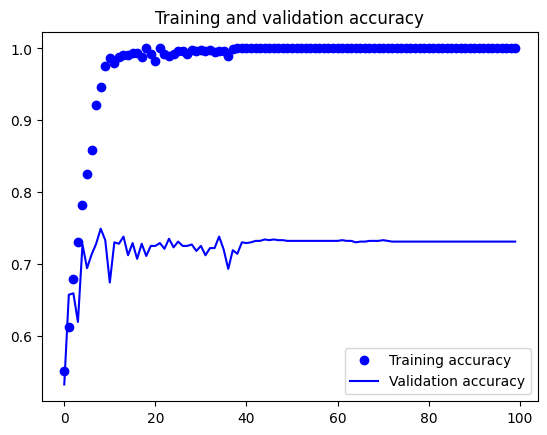

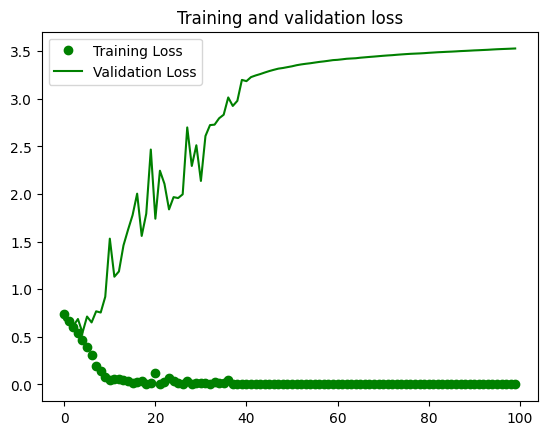

In [14]:
# 정확도와 손실 확인하는 구문

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [24]:
import numpy as np
from google.colab import files
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (150,150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving rkddkwl.jpg to rkddkwl.jpg
1/1 [==============================] - 0s 37ms/step
[1.]
rkddkwl.jpg is a dog
